#**Analisis EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

## Recopilacion y carga de datos

In [11]:
#Cursos Udemy
df3=pd.read_csv('https://raw.githubusercontent.com/Fe23arg/Pi1_12_DEV/main/raw/final_Api_12.csv')
df3.head(4)

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,Franquicia_P,paises,productoras
0,862,['John Lasseter'],30000000.0,en,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995,12.451801,Toy Story Collection,United States of America,Pixar Animation Studios
1,8844,['Joe Johnston'],65000000.0,en,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995,4.043035,sin_franquicia,United States of America,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,15602,['Howard Deutch'],0.0,en,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995,0.000000,Grumpy Old Men Collection,United States of America,"['Warner Bros.', 'Lancaster Gate']"
3,31357,['Forest Whitaker'],16000000.0,en,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995,5.090760,sin_franquicia,United States of America,Twentieth Century Fox Film Corporation


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45451 non-null  int64  
 1   directores         45451 non-null  object 
 2   budget             45451 non-null  float64
 3   original_language  45440 non-null  object 
 4   release_date       45451 non-null  object 
 5   revenue            45451 non-null  float64
 6   runtime            45205 non-null  float64
 7   title              45451 non-null  object 
 8   vote_average       45451 non-null  float64
 9   vote_count         45451 non-null  float64
 10  release_year       45451 non-null  int64  
 11  return             45451 non-null  float64
 12  Franquicia_P       45451 non-null  object 
 13  paises             45451 non-null  object 
 14  productoras        45451 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 5.2+ MB


In [13]:
df3.dtypes

id                     int64
directores            object
budget               float64
original_language     object
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count           float64
release_year           int64
return               float64
Franquicia_P          object
paises                object
productoras           object
dtype: object

In [14]:
# Cantidad de filas y columnas de cada dataframe(csv) provisto:
print('                   Filas , Columnas ')
print("Cantidad:         "+str(df3.shape))

                   Filas , Columnas 
Cantidad:         (45451, 15)


## Busqueda de valores nulos

In [15]:
df3.isnull().sum()

id                     0
directores             0
budget                 0
original_language     11
release_date           0
revenue                0
runtime              246
title                  0
vote_average           0
vote_count             0
release_year           0
return                 0
Franquicia_P           0
paises                 0
productoras            0
dtype: int64

In [16]:
df3.columns

Index(['id', 'directores', 'budget', 'original_language', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'release_year', 'return', 'Franquicia_P', 'paises', 'productoras'],
      dtype='object')

In [17]:
df3c=df3.copy()

In [18]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45451 non-null  int64  
 1   directores         45451 non-null  object 
 2   budget             45451 non-null  float64
 3   original_language  45440 non-null  object 
 4   release_date       45451 non-null  object 
 5   revenue            45451 non-null  float64
 6   runtime            45205 non-null  float64
 7   title              45451 non-null  object 
 8   vote_average       45451 non-null  float64
 9   vote_count         45451 non-null  float64
 10  release_year       45451 non-null  int64  
 11  return             45451 non-null  float64
 12  Franquicia_P       45451 non-null  object 
 13  paises             45451 non-null  object 
 14  productoras        45451 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 5.2+ MB


##2. Limpieza datos
>Eliminar,Unir,Dividir columnas para entender mejor los datos.Revisar q tengan nombre y sobre todo el indice

In [19]:
#Se muestran los elementos en el dataframe duplicados  estos elementos estan repetidos:
df3c[df3c.duplicated()]

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,Franquicia_P,paises,productoras
677,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,0.0,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
678,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,0.0,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
679,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,0.0,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
840,132641,['Mikio Naruse'],0.0,ja,1953-04-29,0.0,89.0,Wife,0.0,0.0,1953,0.0,sin_franquicia,Japan,Toho Company
841,132641,['Mikio Naruse'],0.0,ja,1953-04-29,0.0,89.0,Wife,0.0,0.0,1953,0.0,sin_franquicia,Japan,Toho Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25952,43629,['Christopher Nolan'],0.0,xx,1997-01-01,0.0,3.0,Doodlebug,6.6,105.0,1997,0.0,sin_franquicia,United Kingdom,sin_informacion
25954,187156,"[""Shane O'Sullivan""]",0.0,en,2009-09-30,0.0,24.0,Jean-Luc Cinema Godard,0.0,0.0,2009,0.0,sin_franquicia,United Kingdom,sin_informacion
33227,298721,['Apichatpong Weerasethakul'],980000.0,th,2015-09-02,0.0,122.0,Cemetery of Splendour,4.4,50.0,2015,0.0,sin_franquicia,"['United Kingdom', 'United States of America',...","['Match Factory, The', 'Louverture Films', 'To..."
33228,298721,['Apichatpong Weerasethakul'],980000.0,th,2015-09-02,0.0,122.0,Cemetery of Splendour,4.4,50.0,2015,0.0,sin_franquicia,"['United Kingdom', 'United States of America',...","['Match Factory, The', 'Louverture Films', 'To..."


In [20]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45451 non-null  int64  
 1   directores         45451 non-null  object 
 2   budget             45451 non-null  float64
 3   original_language  45440 non-null  object 
 4   release_date       45451 non-null  object 
 5   revenue            45451 non-null  float64
 6   runtime            45205 non-null  float64
 7   title              45451 non-null  object 
 8   vote_average       45451 non-null  float64
 9   vote_count         45451 non-null  float64
 10  release_year       45451 non-null  int64  
 11  return             45451 non-null  float64
 12  Franquicia_P       45451 non-null  object 
 13  paises             45451 non-null  object 
 14  productoras        45451 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 5.2+ MB


In [21]:
#Elimino las filas duplicadas
df3c.drop_duplicates(inplace=True)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45451 non-null  int64  
 1   directores         45451 non-null  object 
 2   budget             45451 non-null  float64
 3   original_language  45440 non-null  object 
 4   release_date       45451 non-null  object 
 5   revenue            45451 non-null  float64
 6   runtime            45205 non-null  float64
 7   title              45451 non-null  object 
 8   vote_average       45451 non-null  float64
 9   vote_count         45451 non-null  float64
 10  release_year       45451 non-null  int64  
 11  return             45451 non-null  float64
 12  Franquicia_P       45451 non-null  object 
 13  paises             45451 non-null  object 
 14  productoras        45451 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 5.2+ MB


In [23]:
df3c.reset_index(inplace=True, drop=True)

In [24]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45348 entries, 0 to 45347
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45348 non-null  int64  
 1   directores         45348 non-null  object 
 2   budget             45348 non-null  float64
 3   original_language  45337 non-null  object 
 4   release_date       45348 non-null  object 
 5   revenue            45348 non-null  float64
 6   runtime            45102 non-null  float64
 7   title              45348 non-null  object 
 8   vote_average       45348 non-null  float64
 9   vote_count         45348 non-null  float64
 10  release_year       45348 non-null  int64  
 11  return             45348 non-null  float64
 12  Franquicia_P       45348 non-null  object 
 13  paises             45348 non-null  object 
 14  productoras        45348 non-null  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 5.2+ MB


Variable con valores numericos

In [25]:
df3c.describe()

,id,budget,revenue,runtime,vote_average,vote_count,release_year,return
count,45348.000000,4.534800e+04,4.534800e+04,45102.000000,45348.000000,45348.000000,45348.000000,4.534800e+04
mean,108031.352011,4.233319e+06,1.123552e+07,94.179327,5.624188,110.135596,1991.881340,6.604502e+02
std,112178.152300,1.744373e+07,6.440916e+07,38.345530,1.915301,491.888464,24.053997,7.471635e+04
min,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,26388.750000,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,59849.500000,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,156573.750000,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,469172.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


## Outliers
>Son unos datos que se alejan del siguiente punto más cercano.
1.   >Outlier univariado
2.   >Outlier multivariado/bivariado:
  cuando ploteamos una variable con otra el valor se disgrega del valor esperado de manera anormal
  Antes de proceder a eso tenemos que estandardizar los valores para que escalas diferentes no nos lleven a conclusiones equivocadas.


In [26]:
df3c.vote_average.value_counts()

0.0    2944
6.0    2462
5.0    1994
7.0    1882
6.5    1722
       ... 
9.1       2
9.6       1
9.8       1
0.7       1
1.1       1
Name: vote_average, Length: 92, dtype: int64

In [27]:
df3c.original_language.value_counts(normalize=True)

en    0.709928
fr    0.053709
it    0.033703
ja    0.029711
de    0.023755
        ...   
jv    0.000022
qu    0.000022
la    0.000022
fy    0.000022
si    0.000022
Name: original_language, Length: 89, dtype: float64

In [28]:
df3c.sort_values('id', inplace=True)
df3c.head()

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,Franquicia_P,paises,productoras
4338,2,['Aki Kaurismäki'],0.0,fi,1988-10-21,0.0,69.0,Ariel,7.1,44.0,1988,0.000000,sin_franquicia,Finland,"['Villealfa Filmproduction Oy', 'Finnish Film ..."
12940,3,['Aki Kaurismäki'],0.0,fi,1986-10-16,0.0,76.0,Shadows in Paradise,7.1,35.0,1986,0.000000,sin_franquicia,Finland,Villealfa Filmproduction Oy
17,5,"['Allison Anders', 'Alexandre Rockwell', 'Robe...",4000000.0,en,1995-12-09,4300000.0,98.0,Four Rooms,6.5,539.0,1995,1.075000,sin_franquicia,United States of America,"['Miramax Films', 'A Band Apart']"
474,6,['Stephen Hopkins'],0.0,en,1993-10-15,12136938.0,110.0,Judgment Night,6.4,79.0,1993,0.000000,sin_franquicia,"['Japan', 'United States of America']","['Universal Pictures', 'Largo Entertainment', ..."
256,11,['George Lucas'],11000000.0,en,1977-05-25,775398007.0,121.0,Star Wars,8.1,6778.0,1977,70.490728,Star Wars Collection,United States of America,"['Lucasfilm', 'Twentieth Century Fox Film Corp..."


In [29]:
#urdeno el dataset por ganancia
df3o= df3c.sort_values('revenue',ascending=False)
df3o.head()


,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,Franquicia_P,paises,productoras
14542,19995,['James Cameron'],237000000.0,en,2009-12-10,2.787965e+09,162.0,Avatar,7.2,12114.0,2009,11.763566,Avatar Collection,"['United States of America', 'United Kingdom']","['Ingenious Film Partners', 'Twentieth Century..."
26511,140607,['J.J. Abrams'],245000000.0,en,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,7.5,7993.0,2015,8.441729,Star Wars Collection,United States of America,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro..."
1636,597,['James Cameron'],200000000.0,en,1997-11-18,1.845034e+09,194.0,Titanic,7.5,7770.0,1997,9.225171,sin_franquicia,United States of America,"['Paramount Pictures', 'Twentieth Century Fox ..."
17802,24428,['Joss Whedon'],220000000.0,en,2012-04-25,1.519558e+09,143.0,The Avengers,7.4,12000.0,2012,6.907081,The Avengers Collection,United States of America,"['Paramount Pictures', 'Marvel Studios']"
25040,135397,['Colin Trevorrow'],150000000.0,en,2015-06-09,1.513529e+09,124.0,Jurassic World,6.5,8842.0,2015,10.090192,Jurassic Park Collection,United States of America,"['Universal Studios', 'Amblin Entertainment', ..."


*Selecciono las peliculas de los ultimos diez años con la mayor ganancia*

In [51]:
df3o1=df3o.loc[df3['release_year'] >= 2013, ['title', 'revenue','original_language','budget','id','Franquicia_P','paises','vote_average','release_year','runtime','return']].sort_values('revenue',ascending=False)
df3o1.head(10)

,title,revenue,original_language,budget,id,Franquicia_P,paises,vote_average,release_year,runtime,return
25040,Jurassic World,1.513529e+09,en,150000000.0,135397,Jurassic Park Collection,United States of America,6.5,2015,124.0,10.090192
28784,Furious 7,1.506249e+09,en,190000000.0,168259,The Fast and the Furious Collection,"['Japan', 'United States of America']",7.3,2015,137.0,7.927628
41396,Rogue One: A Star Wars Story,1.056057e+09,en,200000000.0,330459,Star Wars Collection,United States of America,7.4,2016,133.0,5.280286
38099,Finding Dory,1.028571e+09,en,200000000.0,127380,Finding Nemo Collection,United States of America,6.8,2016,97.0,5.142854
36185,Zootopia,1.023784e+09,en,150000000.0,269149,sin_franquicia,United States of America,7.7,2016,108.0,6.825228
30447,The Secret Life of Pets,8.754579e+08,en,75000000.0,328111,The Secret Life of Pets Collection,United States of America,5.9,2016,87.0,11.672772
31019,Batman v Superman: Dawn of Justice,8.732602e+08,en,250000000.0,209112,Man of Steel Collection,United States of America,5.7,2016,151.0,3.493041
30264,Inside Out,8.576112e+08,en,175000000.0,150540,sin_franquicia,United States of America,7.9,2015,94.0,4.900635
22022,The Hunger Games: Catching Fire,8.474235e+08,en,130000000.0,101299,The Hunger Games Collection,United States of America,7.4,2013,146.0,6.518642
33298,Wonder Woman,8.205804e+08,en,149000000.0,297762,Wonder Woman Collection,United States of America,7.2,2017,141.0,5.507251


In [31]:
df3o1['Franquicia_P'].value_counts()

sin_franquicia                        7262
The Bowery Boys                         14
Zatôichi: The Blind Swordsman           12
Signed, Sealed, Delivered                7
The Carry On Collection                  6
                                      ... 
Little Witch Academia Collection         1
A Haunted House Collection               1
Saheb Biwi Aur Gangster Collection       1
Outpost Collection                       1
Nativity Collection                      1
Name: Franquicia_P, Length: 451, dtype: int64

In [32]:
df3o1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7896 entries, 25040 to 27766
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7896 non-null   object 
 1   revenue            7896 non-null   float64
 2   original_language  7893 non-null   object 
 3   budget             7896 non-null   float64
 4   id                 7896 non-null   int64  
 5   Franquicia_P       7896 non-null   object 
 6   paises             7896 non-null   object 
 7   vote_average       7896 non-null   float64
 8   release_year       7896 non-null   int64  
 9   runtime            7822 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 678.6+ KB


In [33]:
df5=df3o1.groupby(['Franquicia_P','title'])['budget'].mean()
df5

Franquicia_P                    title                                       
00 Schneider Filmreihe          00 Schneider - Jagd auf Nihil Baxter                  0.0
08/15 Collection                08/15                                                 0.0
12 Rounds Collection            12 Rounds 2: Reloaded                           4000000.0
20th Century Boys Collection    20th Century Boys - Chapter 2: The Last Hope          0.0
                                20th Century Boys - Chapter 3: Our Flag               0.0
                                                                                  ...    
Параграф 78 - Дилогия           Paragraph 78: Film One                                0.0
Самый лучший фильм - Коллекция  The Best Movie                                        0.0
                                The Best Movie 3-DE                             6500000.0
Сказки Чуковского               Doctor Aybolit                                        0.0
식객 시리즈                 

*Visualizo presupuesto medio de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años  *



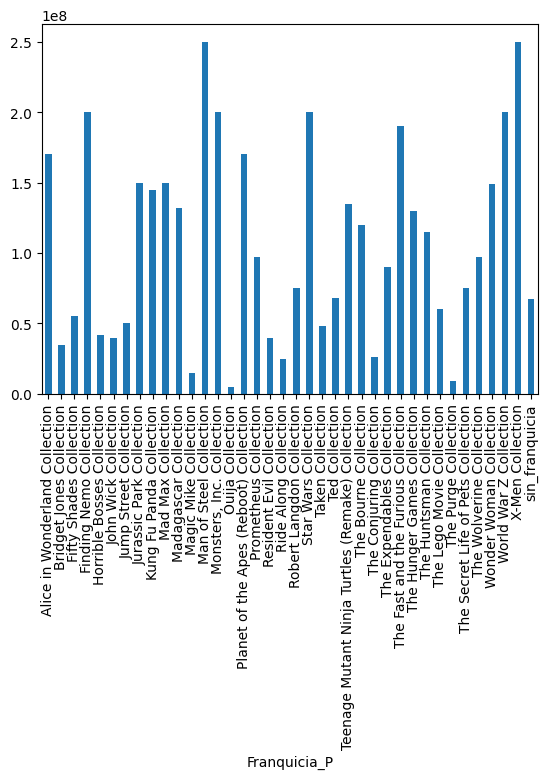

In [34]:
 # Visualizo presupuesto medio de las cien peliculas con mayor presupuesto o costo
 # medio invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años


df3o1[0:100].groupby('Franquicia_P')['budget'].mean().plot.bar()
plt.show()

*Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas agrupadas por franquicias, en los ultimos 10 años  *


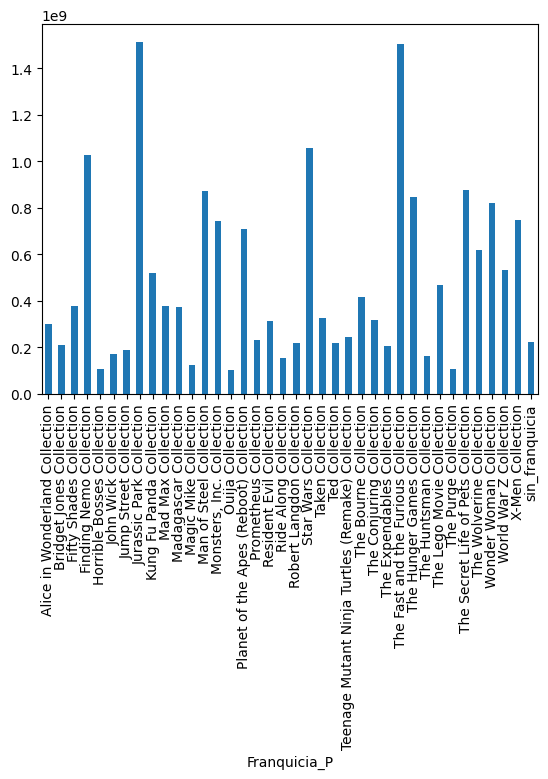

In [35]:
# Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio
# invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años  *

df3o1[0:100].groupby('Franquicia_P')['revenue'].mean().plot.bar()
plt.show()

*Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas ,agrupadas por paises, en los ultimos 10 años ,el mercado japones y americano en proporcion como paises productores de pelicula son  los que han recaudado mas*

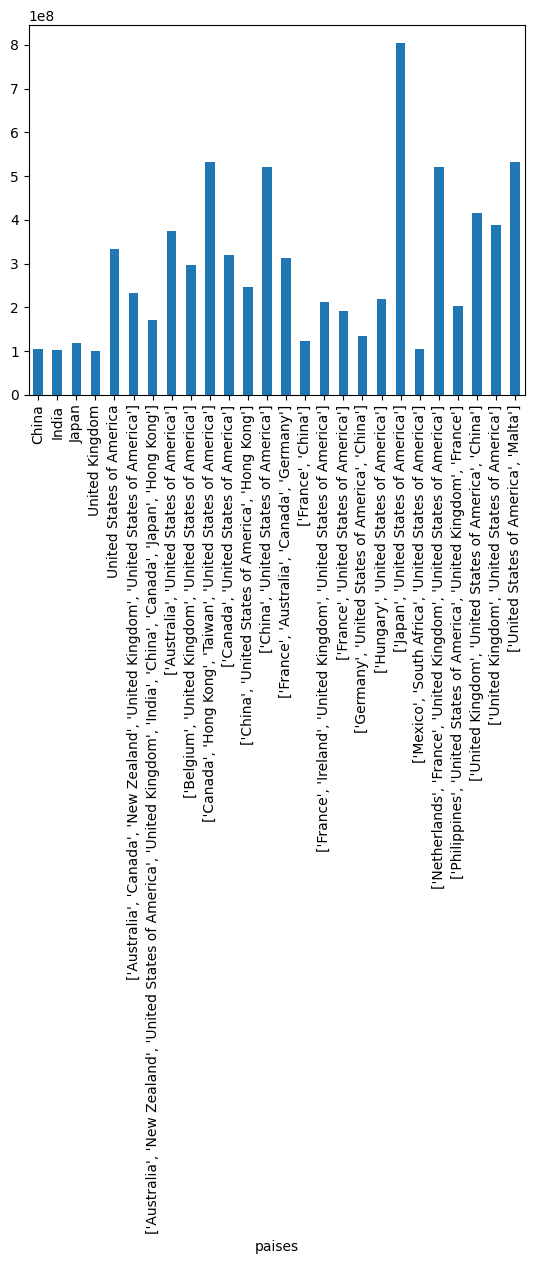

In [36]:
# Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio
# invertido en sus peliculas ,agrupadas por paises, en los ultimos 10 años  *

df3o1[0:100].groupby('paises')['revenue'].mean().plot.bar()
plt.show()

### Analisis univariada Variable

>creo un subgrupo para analizar


In [37]:
dfff=df3o1[df3o1['Franquicia_P']!='sin_franquicia'].copy()
dfff.head(10)

,title,revenue,original_language,budget,id,Franquicia_P,paises,vote_average,release_year,runtime
25040,Jurassic World,1.513529e+09,en,150000000.0,135397,Jurassic Park Collection,United States of America,6.5,2015,124.0
28784,Furious 7,1.506249e+09,en,190000000.0,168259,The Fast and the Furious Collection,"['Japan', 'United States of America']",7.3,2015,137.0
41396,Rogue One: A Star Wars Story,1.056057e+09,en,200000000.0,330459,Star Wars Collection,United States of America,7.4,2016,133.0
38099,Finding Dory,1.028571e+09,en,200000000.0,127380,Finding Nemo Collection,United States of America,6.8,2016,97.0
30447,The Secret Life of Pets,8.754579e+08,en,75000000.0,328111,The Secret Life of Pets Collection,United States of America,5.9,2016,87.0
31019,Batman v Superman: Dawn of Justice,8.732602e+08,en,250000000.0,209112,Man of Steel Collection,United States of America,5.7,2016,151.0
22022,The Hunger Games: Catching Fire,8.474235e+08,en,130000000.0,101299,The Hunger Games Collection,United States of America,7.4,2013,146.0
33298,Wonder Woman,8.205804e+08,en,149000000.0,297762,Wonder Woman Collection,United States of America,7.2,2017,141.0
23320,X-Men: Days of Future Past,7.478628e+08,en,250000000.0,127585,X-Men Collection,"['United Kingdom', 'United States of America']",7.5,2014,131.0
21072,Monsters University,7.435596e+08,en,200000000.0,62211,"Monsters, Inc. Collection",United States of America,7.0,2013,104.0


(0.0, 400.0)

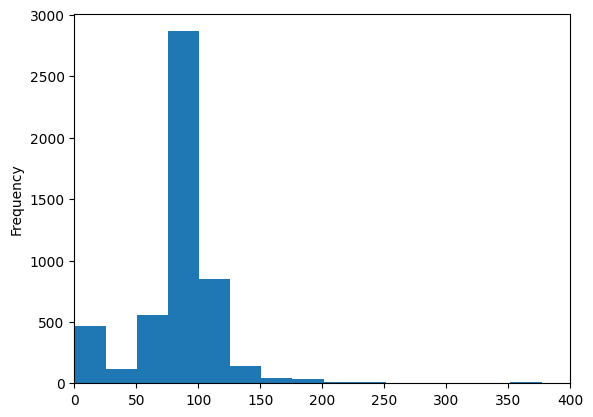

In [38]:

df3o1[df3o1['original_language']=='en'].runtime.plot.hist(bins = 50)
plt.xlim(0,400)
#plt.ylim(0,700)

In [39]:
df3o1.Franquicia_P.value_counts(normalize=True)

sin_franquicia                        0.919706
The Bowery Boys                       0.001773
Zatôichi: The Blind Swordsman         0.001520
Signed, Sealed, Delivered             0.000887
The Carry On Collection               0.000760
                                        ...   
Little Witch Academia Collection      0.000127
A Haunted House Collection            0.000127
Saheb Biwi Aur Gangster Collection    0.000127
Outpost Collection                    0.000127
Nativity Collection                   0.000127
Name: Franquicia_P, Length: 451, dtype: float64

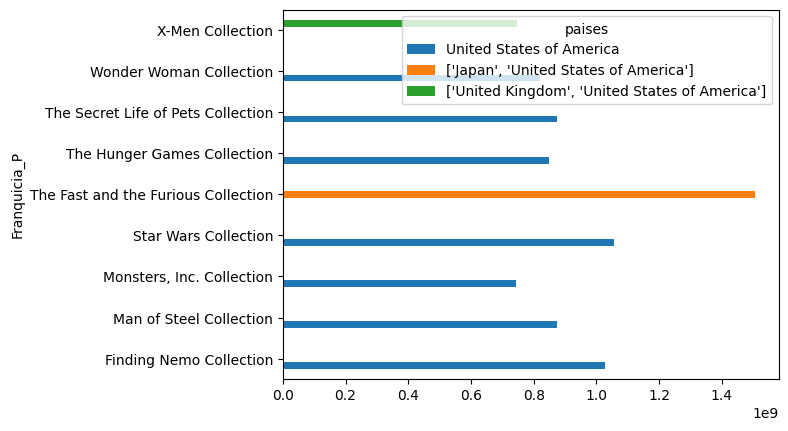

In [40]:
#los 10 franquicias con ganancia media mas alta por pais
dfff[1:10].groupby(['Franquicia_P','paises'])['revenue'].mean().unstack(1).plot.barh()
#plt.legend('')
plt.show()

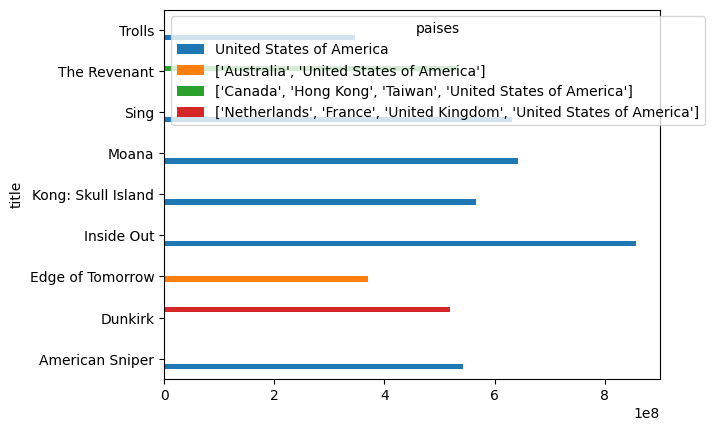

In [41]:
#los 10 peliculas con ganancia media mas alta por pais
dffs=df3o1[df3o1['Franquicia_P']=='sin_franquicia'].copy()
dffs[1:10].groupby(['title','paises'])['revenue'].mean().unstack(1).plot.barh()
#plt.legend('')
plt.show()

In [42]:
df3o1.budget.describe()

count    7.896000e+03
mean     1.839100e+06
std      1.228421e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+08
Name: budget, dtype: float64

<ipython-input-43-18919e77e0f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3o1['budget'])


<Axes: xlabel='budget', ylabel='Density'>

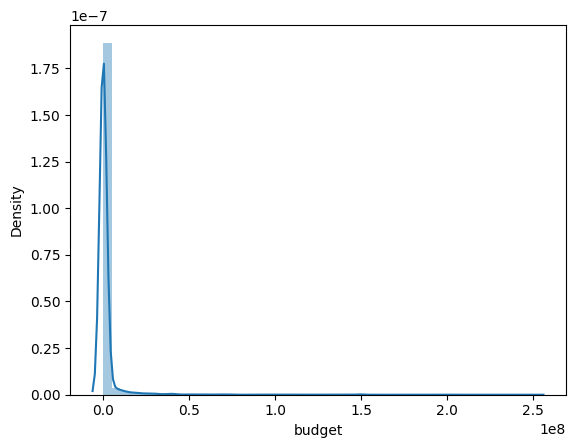

In [43]:
sns.distplot(df3o1['budget'])

*Analizo los votos o puntaje de las peliculas de los ultimos 10 años*

(0.0, 700.0)

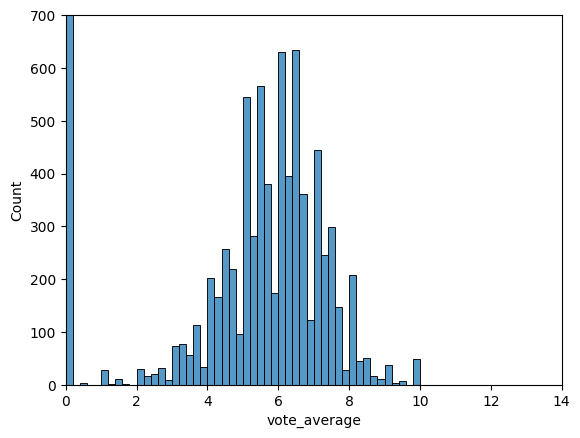

In [44]:
#Analizo lo votos o puntaje de las peliculas de los ultimos 10 años
sns.histplot(df3o1['vote_average'])
plt.xlim(0,14)
plt.ylim(0,700)

###Analisis bivariado

In [45]:
df3o1.describe()

,revenue,budget,id,vote_average,release_year,runtime
count,7.896000e+03,7.896000e+03,7896.000000,7896.000000,7896.000000,7822.000000
mean,4.885986e+06,1.839100e+06,174189.903622,5.332320,1996.669580,88.453848
std,4.959007e+07,1.228421e+07,127222.513688,2.176149,24.353053,45.355430
min,0.000000e+00,0.000000e+00,30.000000,0.000000,1878.000000,0.000000
25%,0.000000e+00,0.000000e+00,59213.500000,4.700000,1985.000000,80.000000
50%,0.000000e+00,0.000000e+00,139809.500000,5.800000,2008.000000,91.000000
75%,0.000000e+00,0.000000e+00,284081.000000,6.700000,2014.000000,103.000000
max,1.513529e+09,2.500000e+08,464819.000000,10.000000,2018.000000,1256.000000


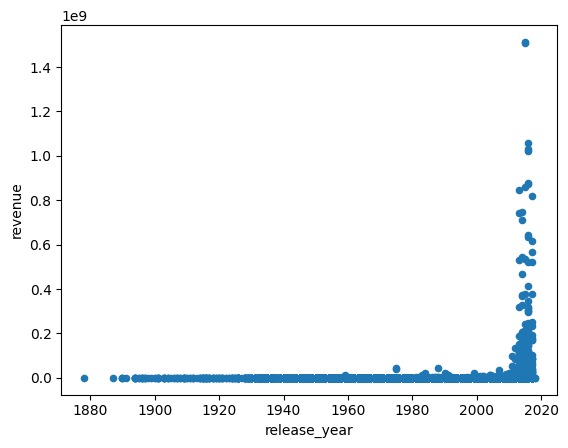

In [52]:
# Reviso los años en que la ganancia que hubo y a partir del año 2018 la ganancia
# o invercion se redujo drasticamente se puede concluir
df3o1.plot.scatter(x="release_year",y="revenue")
plt.show()

###Matrices de correlación




In [53]:
df3o1[['revenue','budget','runtime','return']].corr()

,revenue,budget,runtime,return
revenue,1.000000,0.817197,0.060988,0.201162
budget,0.817197,1.000000,0.086883,0.135619
runtime,0.060988,0.086883,1.000000,0.033801
return,0.201162,0.135619,0.033801,1.000000


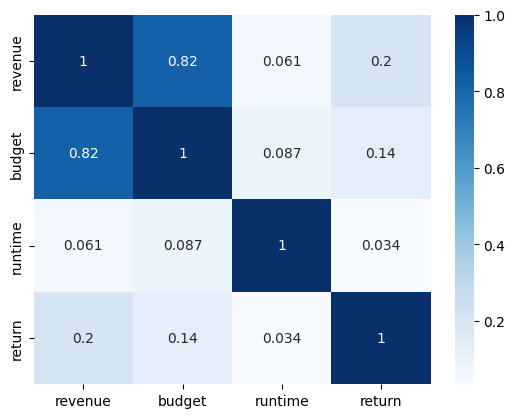

In [56]:
sns.heatmap(df3o1[['revenue','budget','runtime','return']].corr(), annot=True, cmap = 'Blues')
plt.show()

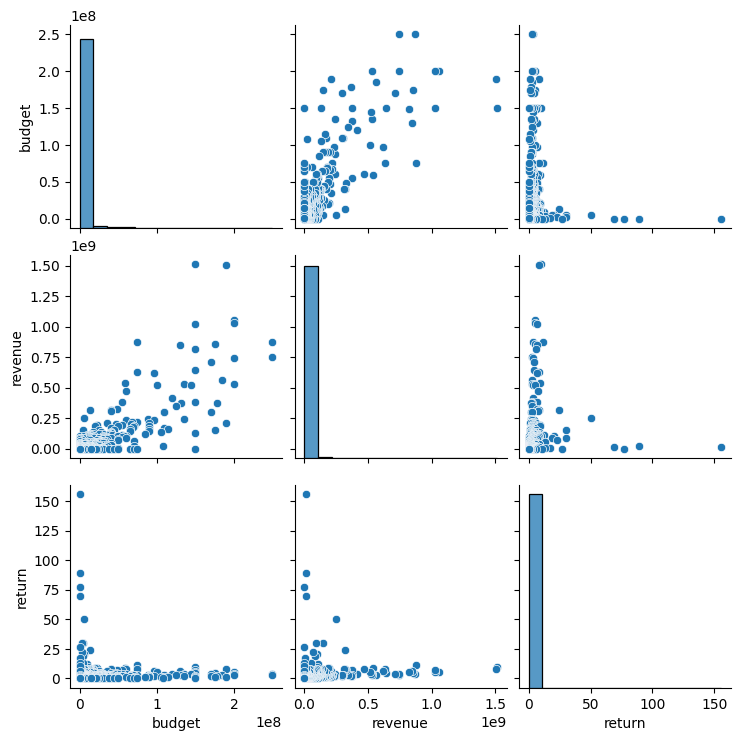

In [57]:

sns.pairplot(data = df3o1, vars=['budget','revenue','return'])
plt.show()

<ipython-input-58-9212edc6a487>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df3o1.corr(method='pearson')


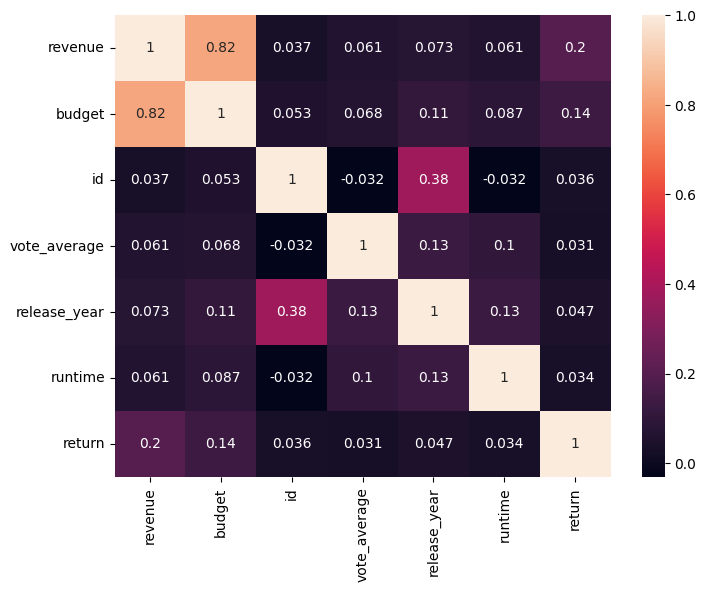

In [58]:
corr_df = df3o1.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## **Nube de Palabras **

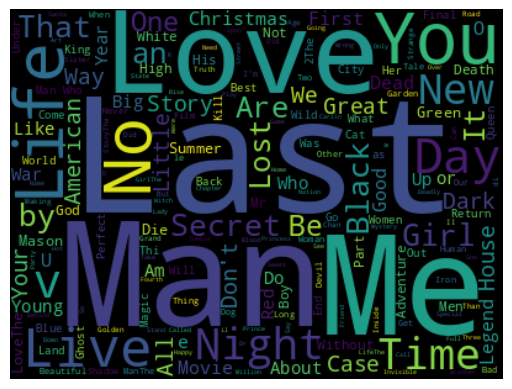

In [59]:
# Creacion de la nube de palabras
texto=''
for i in df3o1['title'].index:
    dat=df3o1['title'][i]
    texto=texto+dat

wc = WordCloud(width = 400, height = 300,
               stopwords = ["En","on","My","at","Is","I","la", "los","de","a","y","s","con","of","to","and","the","for","From","in","para",'with'])
wc.generate(texto)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [60]:
df3o1.to_csv('finAP1.csv',index=False)